Red para intentar predecir precio, se usaron solo los datos numéricos del dataset del proyecto pasado

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/airbnb_clean_F2M4_Postwork7.csv')
df.head()

property_type  room_type                                          amenities  \
0         House          2  {"Wireless Internet","Air conditioning",Kitche...   
1     Apartment          3  {Internet,"Wireless Internet",Kitchen,Heating,...   
2     Apartment          3  {TV,Internet,"Wireless Internet","Air conditio...   
3     Townhouse          2  {"Wireless Internet","Air conditioning","Pets ...   
4   Condominium          3  {TV,"Cable TV",Internet,"Wireless Internet","A...   

   accommodates  bathrooms  bed_type  cancellation_policy  cleaning_fee  \
0             2        0.0         1                    3             1   
1             2        1.0         1                    3             1   
2             4        1.0         1                    3             1   
3             3        1.0         1                    3             1   
4             5        2.0         1                    3             1   

      city                                        description  ...  \
0      NYC  This is a comfortable, simple beautiful room, ...  ...   
1       LA  Renovated clean & modern 1 bedroom in the hear...  ...   
2      NYC  My studio is located in the heart of Bensonhur...  ...   
3       LA  我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...  ...   
4  Chicago  Located in the heart of the bustling Woodlawn/...  ...   

                                                name  neighbourhood  \
0                 AFFORDABLE & COZY IN SUNSET PARK T    Sunset Park   
1  Luxurious and quiet - 30 second walk to the be...         Venice   
2                         Bensonhurst STYLISH STUDIO    Bensonhurst   
3  LA San Gabriel  Suit room 圣盖博大套房 免费停车 Free Par...    San Gabriel   
4  XTRA Large 2bdrm 2bath in the City near "El" T...       Woodlawn   

   number_of_reviews  review_scores_rating  zipcode  bedrooms beds  price  \
0                 15                    89    11232       1.0  1.0   50.0   
1                 12                    98    90291       1.0  1.0  199.0   
2                 26                    94    11214       0.0  2.0   85.0   
3                 33                    95    91776       1.0  2.0   70.0   
4                 60                    88    60637       2.0  2.0   72.0   

   n_days_lastrev  n_days_ashost  
0            2003           4200  
1            2430           3272  
2            2057           2756  
3            2182           2559  
4            2192           2960  

[5 rows x 26 columns]

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df['property_type'].unique()

array(['House', 'Apartment', 'Townhouse', 'Condominium', 'Villa', 'Loft',
       'Bed & Breakfast', 'Guesthouse', 'Other', 'Boutique hotel',
       'Bungalow', 'Cabin', 'Boat', 'Hostel', 'Camper/RV', 'Guest suite',
       'Dorm', 'Island', 'Vacation home', 'Serviced apartment',
       'Timeshare', 'Chalet', 'In-law', 'Tent', 'Train', 'Treehouse',
       'Cave', 'Yurt', 'Lighthouse', 'Castle', 'Hut', 'Earth House',
       'Tipi'], dtype=object)

In [8]:
df['city'] = le.fit_transform(df['city'])
df['property_type'] = le.fit_transform(df['property_type'])
df.head()

property_type  room_type  \
0             16          2   
1              0          3   
2              0          3   
3             27          2   
4             10          3   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             2        0.0   
1  {Internet,"Wireless Internet",Kitchen,Heating,...             2        1.0   
2  {TV,Internet,"Wireless Internet","Air conditio...             4        1.0   
3  {"Wireless Internet","Air conditioning","Pets ...             3        1.0   
4  {TV,"Cable TV",Internet,"Wireless Internet","A...             5        2.0   

   bed_type  cancellation_policy  cleaning_fee  city  \
0         1                    3             1     4   
1         1                    3             1     3   
2         1                    3             1     4   
3         1                    3             1     3   
4         1                    3             1     1   

                                         description  ...  \
0  This is a comfortable, simple beautiful room, ...  ...   
1  Renovated clean & modern 1 bedroom in the hear...  ...   
2  My studio is located in the heart of Bensonhur...  ...   
3  我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...  ...   
4  Located in the heart of the bustling Woodlawn/...  ...   

                                                name  neighbourhood  \
0                 AFFORDABLE & COZY IN SUNSET PARK T    Sunset Park   
1  Luxurious and quiet - 30 second walk to the be...         Venice   
2                         Bensonhurst STYLISH STUDIO    Bensonhurst   
3  LA San Gabriel  Suit room 圣盖博大套房 免费停车 Free Par...    San Gabriel   
4  XTRA Large 2bdrm 2bath in the City near "El" T...       Woodlawn   

   number_of_reviews  review_scores_rating  zipcode  bedrooms beds  price  \
0                 15                    89    11232       1.0  1.0   50.0   
1                 12                    98    90291       1.0  1.0  199.0   
2                 26                    94    11214       0.0  2.0   85.0   
3                 33                    95    91776       1.0  2.0   70.0   
4                 60                    88    60637       2.0  2.0   72.0   

   n_days_lastrev  n_days_ashost  
0            2003           4200  
1            2430           3272  
2            2057           2756  
3            2182           2559  
4            2192           2960  

[5 rows x 26 columns]

In [9]:
X = df.drop(columns=["price","amenities","bed_type","description","host_has_profile_pic","host_identity_verified","instant_bookable","latitude","longitude","name",
                     "neighbourhood","zipcode","n_days_lastrev","n_days_ashost"])
y = df["price"]

In [10]:
X.shape

(49935, 12)

In [15]:
l0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=32, activation="relu")
l2 = tf.keras.layers.Dense(units=1)

In [16]:
b_model = tf.keras.Sequential([l0,l1,l2])

In [17]:
b_model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34954, 12) (14981, 12) (34954,) (14981,)


In [20]:
history = b_model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/1000
1168/1168 [==============================] - 3s 2ms/step - loss: 21895.3125 - accuracy: 0.0000e+00 - val_loss: 17386.0879 - val_accuracy: 0.0000e+00
Epoch 2/1000
1168/1168 [==============================] - 2s 2ms/step - loss: 17468.9336 - accuracy: 0.0000e+00 - val_loss: 16842.1094 - val_accuracy: 0.0000e+00
Epoch 3/1000
1168/1168 [==============================] - 2s 2ms/step - loss: 16925.8457 - accuracy: 0.0000e+00 - val_loss: 16423.7930 - val_accuracy: 0.0000e+00
Epoch 4/1000
1168/1168 [==============================] - 3s 2ms/step - loss: 16565.6387 - accuracy: 0.0000e+00 - val_loss: 16178.6670 - val_accuracy: 0.0000e+00
Epoch 5/1000
1168/1168 [==============================] - 2s 2ms/step - loss: 16245.0322 - accuracy: 0.0000e+00 - val_loss: 15932.7305 - val_accuracy: 0.0000e+00
Epoch 6/1000
1168/1168 [==============================] - 2s 2ms/step - loss: 16036.1758 - accuracy: 0.0000e+00 - val_loss: 15849.7881 - val_accuracy: 0.0000e+00
Epoch 7/1000
1168/1168 [====

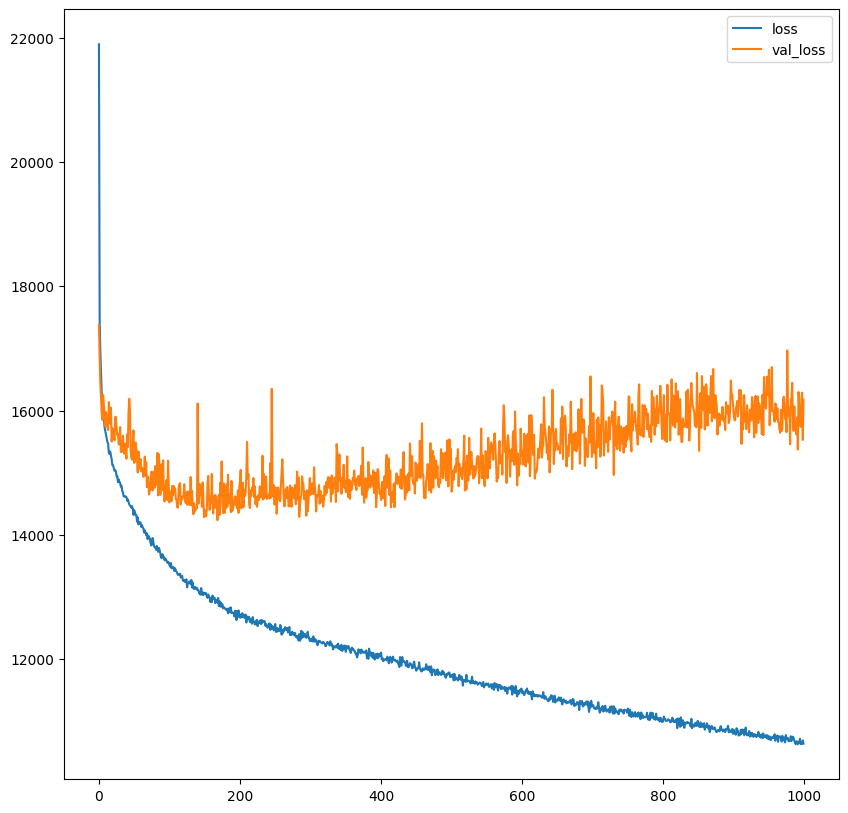

In [21]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

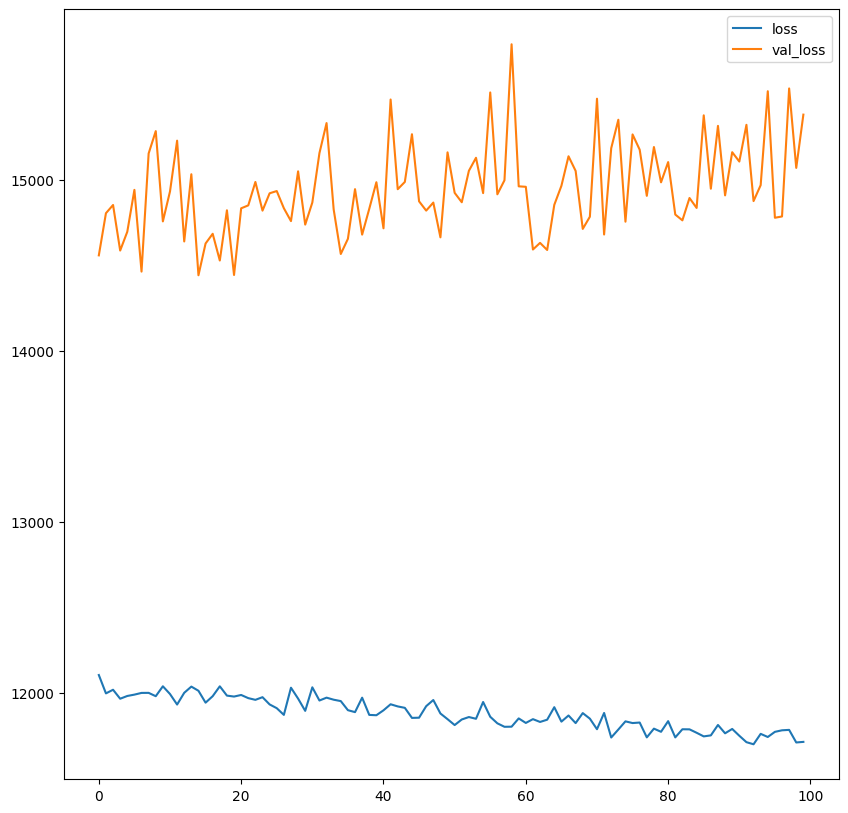

In [22]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"][400:500], label="loss")
plt.plot(history.history["val_loss"][400:500], label="val_loss")

plt.legend(loc="upper right")

In [23]:
y_pred = b_model.predict(X_test)

556/556 [==============================] - 1s 1ms/step


In [24]:
b_model.evaluate(X_test, y_test)[:]

556/556 [==============================] - 1s 1ms/step - loss: 16878.7227 - accuracy: 0.0000e+00


[16878.72265625, 0.0]

In [14]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test, y_pred)

0.42112672164296094